In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Admission_prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [8]:
data.

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [10]:
data['GRE Score'].mode()

0    312.0
1    324.0
dtype: float64

In [11]:
data['GRE Score'].fillna(data['GRE Score'].mean(),inplace= True)

In [12]:
data['TOEFL Score'].fillna(data['TOEFL Score'].mean(),inplace=True)

In [13]:
data['University Rating'].fillna(data['University Rating'].mean(), inplace= True)

In [14]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [15]:
x = data.drop(['Serial No.','Chance of Admit'],axis = 1)
y = data['Chance of Admit']

In [16]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [17]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()

In [44]:
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled

In [45]:
variables.shape

(500, 7)

In [37]:
vif  = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif ['Features'] = x.columns
vif

,VIF,Features
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


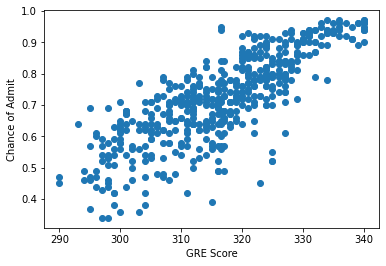

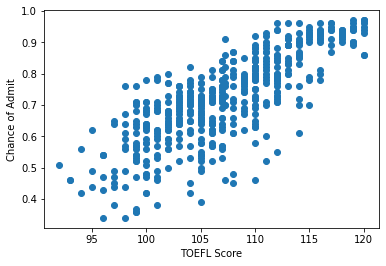

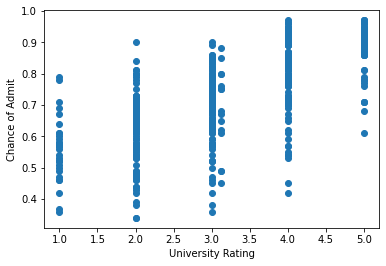

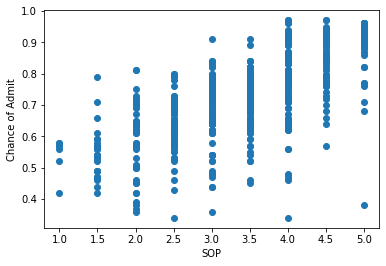

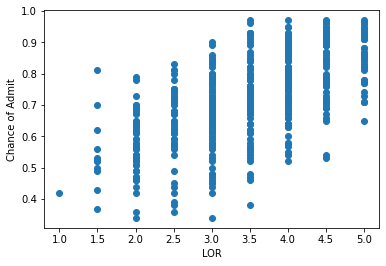

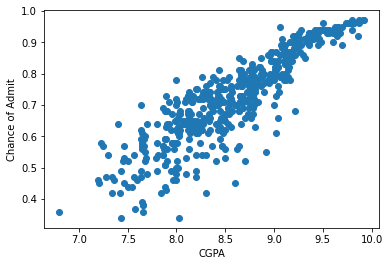

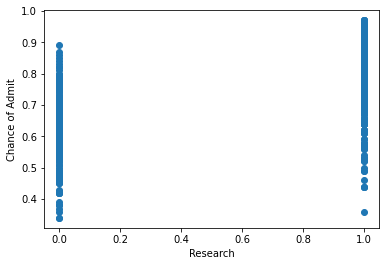

In [18]:
for col in x.columns:
    if col != 0:
            plt.scatter(x[col],y)
            plt.xlabel(col)
            plt.ylabel('Chance of Admit')
            plt.show()

In [101]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y , test_y = train_test_split(x,y, test_size = 0.25, random_state = 100)

In [102]:
train_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
219,312.0,104.0,3.0,3.5,3.5,8.42,0
391,318.0,106.0,3.0,2.0,3.0,8.65,0
375,304.0,101.0,2.0,2.0,2.5,7.66,0
19,303.0,102.0,3.0,3.5,3.0,8.50,0
229,324.0,111.0,4.0,3.0,3.0,9.01,1
...,...,...,...,...,...,...,...
343,305.0,103.0,2.0,2.5,3.5,8.13,0
359,321.0,107.0,2.0,2.0,1.5,8.44,0
323,305.0,102.0,2.0,2.0,2.5,8.18,0
280,311.0,102.0,3.0,4.5,4.0,8.64,1


In [103]:
train_y

219    0.74
391    0.71
375    0.38
19     0.62
229    0.82
       ... 
343    0.59
359    0.81
323    0.62
280    0.68
8      0.50
Name: Chance of Admit, Length: 375, dtype: float64

In [104]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression.fit(train_x,train_y)

LinearRegression()

In [105]:
import pickle

In [106]:
from sklearn.metrics import r2_score
score = r2_score(regression.predict(test_x),test_y)
score

0.8212612570205781

In [107]:
filename = "bharat_kumar_newml.pickle"
pickle.dump(regression,open(filename,'wb'))

In [110]:
train_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
219,312.0,104.0,3.0,3.5,3.5,8.42,0
391,318.0,106.0,3.0,2.0,3.0,8.65,0
375,304.0,101.0,2.0,2.0,2.5,7.66,0
19,303.0,102.0,3.0,3.5,3.0,8.50,0
229,324.0,111.0,4.0,3.0,3.0,9.01,1
...,...,...,...,...,...,...,...
343,305.0,103.0,2.0,2.5,3.5,8.13,0
359,321.0,107.0,2.0,2.0,1.5,8.44,0
323,305.0,102.0,2.0,2.0,2.5,8.18,0
280,311.0,102.0,3.0,4.5,4.0,8.64,1


In [119]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict([[350,100,5,5,5,10,1]])
a

array([0.97113815])